In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import linear_model
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [44]:
np.random.seed(2)

In [45]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

In [46]:
X = np.atleast_2d(np.random.uniform(0, 10.0, size=100)).T
X = X.astype(np.float32)
y = f(X).ravel()
dy = 1.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise
y = y.astype(np.float32)
xx = np.atleast_2d(np.linspace(0, 10, 1000)).T
xx = xx.astype(np.float32)

In [47]:
# alpha = 0.95
# clf = ensemble.GradientBoostingRegressor(loss='quantile', alpha=alpha,
#                                         n_estimators=250, max_depth=3,
#                                         learning_rate=.1, min_samples_leaf=9,
#                                         min_samples_split=9)
clf = linear_model.LinearRegression()
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
# Make the prediction on the meshed x-axis
y_upper = clf.predict(xx)

# clf.set_params(alpha=1.0 - alpha)
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_lower = clf.predict(xx)

# clf.set_params(loss='ls')
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(xx)

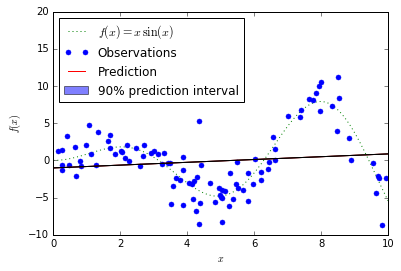

In [49]:
fig = plt.figure()
plt.plot(xx, f(xx), 'g:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(xx, y_pred, 'r-', label=u'Prediction')
plt.plot(xx, y_upper, 'k-')
plt.plot(xx, y_lower, 'k-')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='90% prediction interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show()